In [149]:
'''
Author: Demetric Thompson
Purpose: The purpose of this source code is to automate the API extraction process for cryptocurrency,
and to automate appending data to dataframe
'''

'\nAuthor: Demetric Thompson\nPurpose: The purpose of this source code is to automate the API extraction process for cryptocurrency,\nand to automate appending data to dataframe\n'

In [150]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

In [151]:
#change data rate of jupyter notebook because otherwise the api will not send responce because data rate exceeded
# run this without parenthesee "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10" in anaconda powershell(terminal) to change data rate, 
#and then open file that is under "To access the notebook, open this file in a browser:"


In [152]:
# this is in api docs
# replaced sandbox url with url that is supposed to be used
# replaced sanbox api with api that is given to developers

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f36a2b1e-3273-4001-ba9e-18986a55d5f7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [153]:
print(type(data))

<class 'dict'>


In [163]:
# turn data into dataframe
import pandas as pd
#import for vizualizations later
import seaborn as sns
import matplotlib as mpb

#this allows you to see more columns
pd.set_option('display.max_columns', 150)

#this allows you to see more rows
pd.set_option("display.max_rows", 150)

In [155]:
# Normalization involves adjusting values that exist on different scales into a common scale, 

#lets look at some data columns normalized before pulling json dict data into dataframe

pd.json_normalize(data["status"])


,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-06-21T19:55:00.836Z,0,None,373,1,None,10353


In [157]:
df = (pd.json_normalize(data["data"]))

#create a processing timestamp from when data ran
df["timestamp"] = pd.to_datetime("now")

In [158]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,None,2023-06-21T19:53:00.000Z,30102.63512,34190160398.44783,70.60760,-0.18410,7.65316,16.32647,12.09645,8.84357,5.97836,584243230971.60950,49.91460,632155337600.58997,None,2023-06-21T19:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:55:18.533916
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,None,2023-06-21T19:53:00.000Z,1880.39950,11741918063.13350,81.47550,0.15595,5.61908,8.70831,3.50870,0.28960,3.17489,226025096900.65042,19.31040,226025096900.64999,None,2023-06-21T19:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:55:18.533916
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,None,2023-06-21T19:53:00.000Z,0.99999,42436344342.81070,71.68010,-0.00372,-0.01463,0.01691,-0.01875,-0.02337,-0.16216,83176333419.74121,7.10200,88582782053.52000,None,2023-06-21T19:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 19:55:18.533916
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,None,2023-06-21T19:53:00.000Z,248.64334,741290028.08805,73.52830,-0.55006,2.08769,1.59526,-19.83042,-24.66003,-24.73783,38751765049.94236,3.31100,38751765049.94000,None,2023-06-21T19:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:55:18.533916
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,None,2023-06-21T19:53:00.000Z,0.99999,6835252224.65065,67.79670,0.00039,-0.01862,0.00318,-0.00124,-0.01526,0.04500,28481954417.24936,2.43330,28481954417.25000,None,2023-06-21T19:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 19:55:18.533916
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,None,2023-06-21T19:53:00.000Z,0.49714,1302065391.20969,27.61010,-0.28772,1.76465,-1.06690,8.06545,5.52376,11.72811,25900480126.42464,2.21300,49714320206.00000,None,2023-06-21T19:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:55:18.533916
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,None,2023-06-21T19:53:00.000Z,0.28497,347103263.73465,72.53930,-0.08056,6.92519,5.26084,-22.66392,-28.02693,-23.83945,9952433924.09539,0.85030,12823467119.06000,None,2023-06-21T19:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:55:18.533916
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,None,2023-06-21T19:53:00.000Z,0.06570,370635400.12854,119.27230,-0.43961,5.19426,6.68851,-9.87504,-18.19978,-14.87626,9188993035.41821,0.78460,9188993035.42000,None,2023-06-21T19:53:00.000Z,na

In [181]:
#create api function that runs the get request from api

def api_runner():
    #create df as global variable to use outside of function
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f36a2b1e-3273-4001-ba9e-18986a55d5f7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # create new dataframe to append data
    
    #this is one way but i think it pulls in duplicates
#     df2 = (pd.json_normalize(data["data"]))
    
    #create a processing timestamp from when data ran
    # and append new dataframe to old dataframe
#     df2["timestamp"] = pd.to_datetime("now")
#     df = df.append(df2)

    # this is probably a better way to do it
    #create a initial dataframe
    df_0 = pd.json_normalize(data["data"])
    df_0["timestamp"] = pd.to_datetime("now")
    #create empty dataframe with columns from initial dataframe
    column_names = df_0.columns
    df = pd.DataFrame(columns= column_names)
    #create datframe that will be appended to csv only
    df_csv = df_0
    #append to data
    df = df.append(df_0)
    
    #check if file to save api dataframe is created, if not create
    if not os.path.isfile(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv"):
        df_csv.to_csv(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv",header = "column_names")
    #if file to save api dataframe is created, put file in append mode and put header argument as False
    #or it will add a new headers in the middle of data
    else:
        df_csv.to_csv(r"C:\Users\demet\OneDrive - Georgia State University\Documents\Portfolio project\Data Analysis projects for portfolio\AlexTheAnalyst projects\Python\automate_crypto_api.csv",mode= 'a',header = False)

In [182]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [183]:
#automating code
import os
from time import time
from time import sleep

#used 333 because that is limit on times api can be run in a day
for i in range(0,333,1):
    api_runner()
    print("api_runner completed correctly")
    #sleep module counts by seconds default
    #make it sleep for one minute
    sleep(60)
exit()


api_runner completed correctly


KeyboardInterrupt: 

In [184]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,nan,2023-06-21T20:00:00.000Z,30132.43007,34219579882.75569,70.39960,0.01053,7.65661,16.48377,12.19192,9.06330,6.08941,584821502418.50244,49.89540,632781031425.28003,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:02:12.721940
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,nan,2023-06-21T20:00:00.000Z,1882.77418,11750039002.41163,80.98660,0.36675,5.65330,8.91150,3.65617,0.54850,3.27567,226310533954.33896,19.30820,226310533954.34000,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:02:12.721940
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,nan,2023-06-21T20:00:00.000Z,1.00020,42423963293.11861,71.04630,0.03537,-0.01379,0.04071,0.00438,0.00234,-0.08938,83193855665.29808,7.09700,88601443242.28999,nan,2023-06-21T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 20:02:12.721940
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,nan,2023-06-21T20:00:00.000Z,248.94344,741320207.79433,73.02410,-0.31068,2.15084,1.77427,-19.71460,-24.54081,-24.64336,38798536351.75412,3.30970,38798536351.75000,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:02:12.721940
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,nan,2023-06-21T20:00:00.000Z,1.00033,6820941147.11801,66.56500,0.03935,-0.00143,0.03157,0.02116,0.02688,0.12976,28491752798.83806,2.43080,28491752798.84000,nan,2023-06-21T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 20:02:12.721940
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,nan,2023-06-21T20:00:00.000Z,0.49800,1302723781.79612,27.60870,-0.15420,1.88071,-0.71643,8.22357,5.85693,11.96680,25944922844.49887,2.21320,49799625169.71000,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:02:12.721940
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,nan,2023-06-21T20:00:00.000Z,0.28547,346658865.01126,71.31520,0.27027,7.20090,5.41502,-22.50565,-27.80053,-23.88667,9970172558.77934,0.85060,12846322914.97000,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 20:02:12.721940
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,nan,2023-06-21T20:00:00.000Z,0.06581,371822070.41286,119.19340,-0.09953,5.34062,6.97608,-9.75928,-17.93750,-14.73163,9204627783.55145,0.78520,9204627783.55000,nan,2023-06-21T20:00:00.000Z,nan,NaN,NaN,NaN,NaN,2023-

In [165]:
#change float format from scientific notation to decimal
pd.set_option("display.float_format",lambda x: "%.5f" % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19408375.00000,19408375.00000,False,nan,1,nan,nan,None,2023-06-21T19:54:00.000Z,30131.91014,34197113612.41071,70.67140,-0.15350,7.77713,16.47469,12.19681,8.94787,6.02486,584811411549.91699,49.93280,632770113033.58997,None,2023-06-21T19:54:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:56:04.044991
1,1027,Ethereum,ETH,ethereum,7026,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120200572.43909,120200572.43909,True,nan,2,nan,nan,None,2023-06-21T19:54:00.000Z,1882.36238,11745080879.58057,81.54010,0.23082,5.73964,8.85013,3.61419,0.39539,3.19898,226261035268.26743,19.31880,226261035268.26999,None,2023-06-21T19:54:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:56:04.044991
2,825,Tether,USDT,tether,55761,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,83177035118.23695,88583529362.30705,True,nan,3,nan,nan,None,2023-06-21T19:54:00.000Z,1.00025,42438730722.26156,71.69180,0.03434,-0.01022,0.04341,0.01492,0.00317,-0.16740,83197861531.59029,7.10390,88605709489.25999,None,2023-06-21T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-21 19:56:04.044991
3,1839,BNB,BNB,bnb,1464,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155852815.82893,155852815.82893,False,nan,4,nan,nan,None,2023-06-21T19:54:00.000Z,248.63448,741528871.78903,73.61850,-0.54667,2.07122,1.59507,-19.83590,-24.65943,-24.75700,38750383277.86507,3.31090,38750383277.87000,None,2023-06-21T19:54:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:56:04.044991
4,3408,USD Coin,USDC,usd-coin,13061,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,28482353106.54124,28482353106.54124,False,nan,5,nan,nan,None,2023-06-21T19:54:00.000Z,1.00030,6835788571.27965,67.81210,0.03397,-0.00223,0.03193,0.03041,0.01883,0.07488,28490887622.84699,2.43260,28490887622.85000,None,2023-06-21T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-21 19:56:04.044991
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52098630775.00000,99988842772.00000,False,nan,6,nan,nan,None,2023-06-21T19:54:00.000Z,0.49717,1302286599.11916,27.63460,-0.29100,1.76864,-1.05108,8.06808,5.53345,11.73153,25901929355.69627,2.21310,49717101909.18000,None,2023-06-21T19:54:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:56:04.044991
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34924995122.31100,35905661251.43000,False,nan,7,nan,nan,None,2023-06-21T19:54:00.000Z,0.28504,347144515.14185,72.56110,-0.06500,6.94189,5.29753,-22.64578,-28.00788,-23.83996,9955101882.39653,0.85000,12826904717.92000,None,2023-06-21T19:54:00.000Z,nan,NaN,NaN,NaN,NaN,2023-06-21 19:56:04.044991
7,74,Dogecoin,DOGE,dogecoin,730,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139861666383.70523,139861666383.70523,True,nan,8,nan,nan,None,2023-06-21T19:54:00.000Z,0.06571,370889345.72822,119.32830,-0.42513,5.21412,6.71633,-9.86557,-18.18573,-14.88113,9190530106.28229,0.78470,9190530106.28000,None,2023-06-21T19:54:00.000Z,nan,NaN

In [166]:
#group by name in descending order
df2 = df.groupby("name",sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", \
                              "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", \
                              "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()

In [167]:
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.15350,7.77713,16.47469,12.19681,8.94787,6.02486
Ethereum,0.23082,5.73964,8.85013,3.61419,0.39539,3.19898
Tether,0.03434,-0.01022,0.04341,0.01492,0.00317,-0.16740
BNB,-0.54667,2.07122,1.59507,-19.83590,-24.65943,-24.75700
USD Coin,0.03397,-0.00223,0.03193,0.03041,0.01883,0.07488
XRP,-0.29100,1.76864,-1.05108,8.06808,5.53345,11.73153
Cardano,-0.06500,6.94189,5.29753,-22.64578,-28.00788,-23.83996
Dogecoin,-0.42513,5.21412,6.71633,-9.86557,-18.18573,-14.88113
Solana,0.24941,4.81106,13.32326,-13.08272,-21.56134,-22.60737


In [168]:
#use  stack method to convert dataframe columns to rows
# it will convert dataframe to series
df3 = df2.stack()
print(type(df3))
df3

<class 'pandas.core.series.Series'>


name                                         
Bitcoin          quote.USD.percent_change_1h     -0.15350
                 quote.USD.percent_change_24h     7.77713
                 quote.USD.percent_change_7d     16.47469
                 quote.USD.percent_change_30d    12.19681
                 quote.USD.percent_change_60d     8.94787
                 quote.USD.percent_change_90d     6.02486
Ethereum         quote.USD.percent_change_1h      0.23082
                 quote.USD.percent_change_24h     5.73964
                 quote.USD.percent_change_7d      8.85013
                 quote.USD.percent_change_30d     3.61419
                 quote.USD.percent_change_60d     0.39539
                 quote.USD.percent_change_90d     3.19898
Tether           quote.USD.percent_change_1h      0.03434
                 quote.USD.percent_change_24h    -0.01022
                 quote.USD.percent_change_7d      0.04341
                 quote.USD.percent_change_30d     0.01492
                 quote.USD

In [169]:
#convert series back to dataframe
df4 = df3.to_frame(name="values")
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.15350
                quote.USD.percent_change_24h   7.77713
                quote.USD.percent_change_7d   16.47469
                quote.USD.percent_change_30d  12.19681
                quote.USD.percent_change_60d   8.94787
                quote.USD.percent_change_90d   6.02486
Ethereum        quote.USD.percent_change_1h    0.23082
                quote.USD.percent_change_24h   5.73964
                quote.USD.percent_change_7d    8.85013
                quote.USD.percent_change_30d   3.61419
                quote.USD.percent_change_60d   0.39539
                quote.USD.percent_change_90d   3.19898
Tether          quote.USD.percent_change_1h    0.03434
                quote.USD.percent_change_24h  -0.01022
                quote.USD.percent_change_7d    0.04341
                quote.USD.percent_change_30d   0.01492
                quote.USD.percent_change_60d   0.00317
                quote.USD.percent_change_90d  -0.16740
BNB             quote.USD.percent_change_1h   -0.54667
                quote.USD.percent_change_24h   2.07122
                quote.USD.percent_change_7d    1.59507
                quote.USD.percent_change_30d -19.83590
                quote.USD.percent_change_60d -24.65943
                quote.USD.percent_change_90d -24.75700
USD Coin        quote.USD.percent_change_1h    0.03397
                quote.USD.percent_change_24h  -0.00223
                quote.USD.percent_change_7d    0.03193
                quote.USD.percent_change_30d   0.03041
                quote.USD.percent_change_60d   0.01883
                quote.USD.percent_change_90d   0.07488
XRP             quote.USD.percent_change_1h   -0.29100
                quote.USD.percent_change_24h   1.76864
                quote.USD.percent_change_7d   -1.05108
                quote.USD.percent_change_30d   8.06808
                quote.USD.percent_change_60d   5.53345
                quote.USD.percent_change_90d  11.73153
Cardano         quote.USD.percent_change_1h   -0.06500
                quote.USD.percent_change_24h   6.94189
                quote.USD.percent_change_7d    5.29753
                quote.USD.percent_change_30d -22.64578
                quote.USD.percent_change_60d -28.00788
                quote.USD.percent_change_90d -23.83996
Dogecoin        quote.USD.percent_change_1h   -0.42513
                quote.USD.percent_change_24h   5.21412
                quote.USD.percent_change_7d    6.71633
                quote.USD.percent_change_30d  -9.86557
                quote.USD.percent_change_60d -18.18573
                quote.USD.percent_change_90d -14.88113
Solana          quote.USD.percent_change_1h    0.24941
                quote.USD.percent_change_24h   4.81106
                quote.USD.percent_change_7d   13.32326
                quote.USD.percent_change_30d -13.08272
                quote.USD.percent_change_60d -21.56134
                quote.USD.percent_change_90d -22.60737
TRON            quote.USD.percent_change_1h   -0.21192
                quote.USD.percent_change_24h   2.69352
                quote.USD.percent_change_7d   -0.38593
                quote.USD.percent_change_30d  -8.66545
                quote.USD.percent_change_60d   9.12075
                quote.USD.percent_change_90d  10.32076
Litecoin        quote.USD.percent_change_1h   -0.28113
                quote.USD.percent_change_24h   6.82509
                quote.USD.percent_change_7d   10.85146
                quote.USD.percent_change_30d  -6.29193
                quote.USD.percent_change_60d  -2.16650
                quote.USD.percent_change_90d  -9.26501
Polygon         quote.USD.percent_change_1h   -0.01069
                quote.USD.percent_change_24h   6.04318
                quote.USD.percent_change_7d    2.25223
                quote.USD.percent_change_30d -23.78164
                quote.USD.percent_change_60d -35.16885
                quote.USD.percent

In [170]:
#this is one way to create index for series turned into dataframe
#create an index for this dataframe
#first create list to save index range
index_range = [x for x in range(0,len(df4))]
#then create index using Index method from python
index = pd.Index(index_range)
df5 = df4.set_index(index)
df5



,values
0,-0.15350
1,7.77713
2,16.47469
3,12.19681
4,8.94787
5,6.02486
6,0.23082
7,5.73964
8,8.85013
9,3.61419


In [172]:

#this is another way to do the index that is multi-indexed, better for this program
df6 = df4.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15350
1,Bitcoin,quote.USD.percent_change_24h,7.77713
2,Bitcoin,quote.USD.percent_change_7d,16.47469
3,Bitcoin,quote.USD.percent_change_30d,12.19681
4,Bitcoin,quote.USD.percent_change_60d,8.94787
5,Bitcoin,quote.USD.percent_change_90d,6.02486
6,Ethereum,quote.USD.percent_change_1h,0.23082
7,Ethereum,quote.USD.percent_change_24h,5.73964
8,Ethereum,quote.USD.percent_change_7d,8.85013
9,Ethereum,quote.USD.percent_change_30d,3.61419


In [173]:
#rename column to percent change
df7 = df6.rename(columns = {"level_1" : "percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15350
1,Bitcoin,quote.USD.percent_change_24h,7.77713
2,Bitcoin,quote.USD.percent_change_7d,16.47469
3,Bitcoin,quote.USD.percent_change_30d,12.19681
4,Bitcoin,quote.USD.percent_change_60d,8.94787
5,Bitcoin,quote.USD.percent_change_90d,6.02486
6,Ethereum,quote.USD.percent_change_1h,0.23082
7,Ethereum,quote.USD.percent_change_24h,5.73964
8,Ethereum,quote.USD.percent_change_7d,8.85013
9,Ethereum,quote.USD.percent_change_30d,3.61419


In [174]:
#change values to better format
df7["percent_change"] = df7['percent_change'].replace(["quote.USD.percent_change_1h",\
                               'quote.USD.percent_change_24h','quote.USD.percent_change_7d',\
                               'quote.USD.percent_change_30d',"quote.USD.percent_change_60d",\
                               "quote.USD.percent_change_90d"],
                             ["1h","24h","7d","30d","60d","90d"])

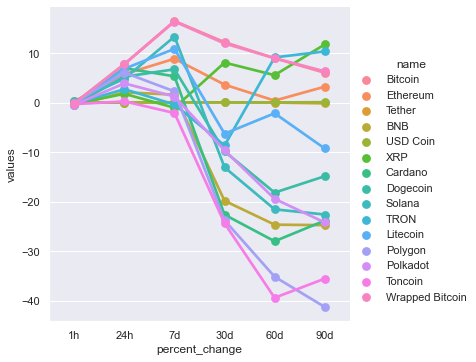

In [175]:
sns.catplot(x="percent_change", y="values",hue = "name", data = df7, kind = "point")

In [176]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.15350
1,Bitcoin,24h,7.77713
2,Bitcoin,7d,16.47469
3,Bitcoin,30d,12.19681
4,Bitcoin,60d,8.94787
5,Bitcoin,90d,6.02486
6,Ethereum,1h,0.23082
7,Ethereum,24h,5.73964
8,Ethereum,7d,8.85013
9,Ethereum,30d,3.61419


In [177]:
#now let's look at a crypto currency's value at the time it was ran by interpreter
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Ethereum'")
df8

,name,quote.USD.price,timestamp
1,Ethereum,1882.36238,2023-06-21 19:56:04.044991


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

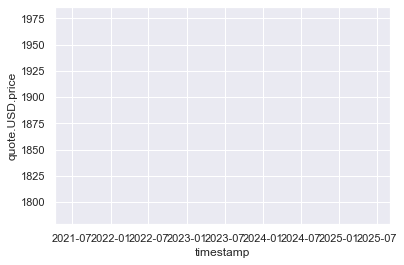

In [178]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)
